<a href="https://colab.research.google.com/github/MLJCUnito/ProjectX2020/blob/master/HowToTackleAMLCompetition/Lecture1%7CFeatureProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 1: Feature Processing**
(Author: Simone Azeglio, simone.azeglio@edu.unito.it)

---
---

## **Overview**

* [Practical Gradient Descent](#section1)
    * [Macro, Meso, Micro-scale in Science](#section1.1)
    * [Scaling in Data Science](#section1.2)
    * [Preprocessing Data](#section1.3)

* [Feature Engineering](#section2)
    * [Feature Importance](#section2.0)
    * [Feature Extraction](#section2.1)
    * [Feature Selection](#section2.2)
    * [Feature Construction](#section2.3)

* [Discerning between different kinds of features](#section3)

* [Handling missing values](#section4)

---
---

<a id='section1'></a>
## **Practical Gradient Descent**
In this first part, we'd like to tell you about some practical tricks for making **gradient descent** work well, in particular, we're going to delve into feature scaling. As an introductory view, it seems reasonable to try to depict an intuition of the concept of *scale*. 

<a id='section1.1'></a>
### **Macro, Meso, Micro-scale in Science**

As scientists, we are well aware of the effects of using a specific measurement tool in order to characterize some quantity and describe reality. As an ideal example we consider the **length scale**. 

<img src="https://raw.githubusercontent.com/sazio/sazio.github.io/master/_posts/img/HowToTackle/Lecture1/1.0.png" width="500" height="300">

We can identify three different points of view: *microscopic*, *mesoscopic* and *macroscopic*; which are intimately related to the adopted lenght scale. 

We usually deal with the *macroscopic scale* when the observer is in such a position (pretty far, in terms of distance), with respect to the object, that she/he can describe its global characteristics. Instead, we do refer to the *microscopic scale* when the observer is so close to the object that she/he can describe its atomistic details or elementary parts (e.g. molecules, atoms, quarks). Last but not least, we talk about *mesoscopic scale* everytime we are in between micro and macro. 

These definitions are deliberately vague, since delineating a precise and neat explanation would be higly difficult and complex, and it's actually far from our purposes. 

On the other side, this kind of introduction is quite useful, we should take a few minutes to think about the "active" role of the observer and about the fact that, to be honest, for every length scale, there's some specific theory, i.e. there's no global theory for a multi-scale description of some phenomenon. 

<a id='section1.2'></a>
### **Scaling in Data Science**

If our beloved observer (i.e. the scientist) has some kind of "privilege", i.e. choosing the right measurement tool, which is nothing but choosing the right scale in the description of some phenomenon, we can't really say the same for a data scientist. 

It's a sort of paradox, but a data scientist can't really deal with data retrieval most of the times. Because of that, a data scientist is often left alone in front of data, without even knowing from which measurement tool they're coming from. There's no way to interact with the length scale for example. 

Is there something that we can do about it? The only thing we can do is assuming that features are independent and scale these features in order to have something compatible from one to the other. This procedure is called **feature scaling**, and soon we'll understand why it is useful even for ML algorithms, such as gradient descent. 

<img src="https://raw.githubusercontent.com/sazio/sazio.github.io/master/_posts/img/HowToTackle/Lecture1/1.1.png" width="500" height="300">

If you make sure that features are on similar scales, i.e. features take on similar range of values, then gradient descent can converge more quickly. 

More concretely, let's say we have a problem with two features where $x_1$ is the length of a football field and take values between $90$ (meters) and $115$ (meters) and $x_2$ is the radius of a ball which takes values between $10.5* 10^{-2}$ (meters) to $11.5* 10^{-2}$ (meters). If you plot the countours of the cost function $J(\omega)$ then you might get something similar to the *left plot*, and because of these very skewed elliptical shape, if we run gradient descent on this cost function, it may end up taking a long time and oscillating back and forth before reaching the global minimum. 

In these settings, as stated previously, a useful thing to do is to scale the features. Generally, the idea is to get every feature into approximately a $-1$ to $+1$ range. By doing this, we get the *right plot*. In this way, you can find a much more direct path to the global minimum rather than taking a much more convoluted path where you're sort of trying to follow a very complicated trajectory. 

<a id='section1.3'></a>
### **Preprocessing Data**
ToDo: 

CODE

---
---

<a id='section2'></a>
## **Feature Engineering**

The real deal is that nobody explicitly tells you what **feature engineering** is, in some way, you are expected to understand for yourself what are good features.

<img src="https://raw.githubusercontent.com/sazio/sazio.github.io/master/_posts/img/HowToTackle/Lecture1/1.2.jpg" width="700" height="300">

> Feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success. […] Much of the success of machine learning is actually success in engineering features that a learner can understand. 

>*(Scott Locklin, in “Neglected machine learning ideas”)* 

Let's try to figure out what feature engineering is. 

In solving such problems, our goal is to get the best possible result from a model. In order to achieve that, we need to extract useful information and get the most from what we have. On one side, this includes getting the best possible result from the algorithms we are employing. On the other side, it also involves getting the most out of the available data. 

*How do we get the most out of our data for predictive modeling?* 

Feature engineering tries to find an answer to this question. 

> Actually, the success of all Machine Learning algorithms depends on how you present the data. 

> (*Mohammad Pezeshki, answer to “What are some general tips on feature selection and engineering that every data scientist should know?"*)



<a id='section2.0'></a>
### **Feature Importance**
Feature importance refers to a bunch of techniques that assign a score to input features based on how useful they are at predicting a target variable. These scores play an important role in predictive modeling, they usually provide useful insights into the dataset and the basis for dimensionality reduction and feature selection. 

Feature importance scores can be calculated both for regression and classification problems. 

These scores can be used in a range of situations, such as:
* *Better understanding the data*: the relative scorse can highlight which features may be most relevant to the target, and on the other side, which are least relevant. This could be a useful notion for a domain expert and could be used as a basis for gathering more or different data. 


* *Better understanding a model*: inspecting the importance score provides insights into the specific model we're using and which features are the most important to the model when elaborating a prediction. 


* *Reducing the number of input features*: we can use the importance scores to select those features to delete (lowest score) and those to keep (highest scores). 

Now let's jot down a few lines of code in order to grasp this topic in a better way. 

---

**<ins> Check Scikit-Learn Version </ins>**


In [1]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


Now, in order to explore feature importance scores, we'll import a few test datasets directly from sklearn. 

**<ins>Classification Dataset</ins>**

Easy peasy, we can use the [*make_classification()*](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to create a test binary classification dataset. 

We can specify the number of samples and the number of features, some of them are going to be informative and the remaining redundant. (*Tip*: you should fix the *random seed*, in this way you'll get a reproducible result)


In [6]:
# classification dataset
from sklearn.datasets import make_classification
# define dataset
X_clf, y_clf = make_classification(n_samples=1000, n_features=15, n_informative=6, n_redundant=9, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 15) (1000,)


**<ins>Regression Dataset</ins>**

In a parallel fashion, we'll use the [*make_regression()*](https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable.) function to create a regression dataset. 

In [8]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=15, n_informative=6, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 15) (1000,)


### Coefficients as Feature Importance 

When we think about linear machine learning algorithms, we always fit a model where the prediction is the weighted sum of the input values (e.g. linear regression, logistic regression, ridge regression etc..) 

These coefficients can be used directly as naive feature importance scores. Firstly we'll fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and create a bar chart to get an idea of the relative importance. 

<ins>**Linear Regression Feature Importance**</ins>

It's time to fit a [*LinearRegression()*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model on the regression dataset and get the *coef_* property that conatins the coefficients. The only assumption is that the input variables have the same scale or have been scaled prior to fitting the model. 

This same approach can be used with regularized linear models, such as Ridge and ElasticNet. 


Feature: 0, Score: 26.41417
Feature: 1, Score: -0.00000
Feature: 2, Score: 70.90040
Feature: 3, Score: 0.00000
Feature: 4, Score: 62.16242
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 3.66728
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 68.99048
Feature: 13, Score: 25.57761
Feature: 14, Score: 0.00000


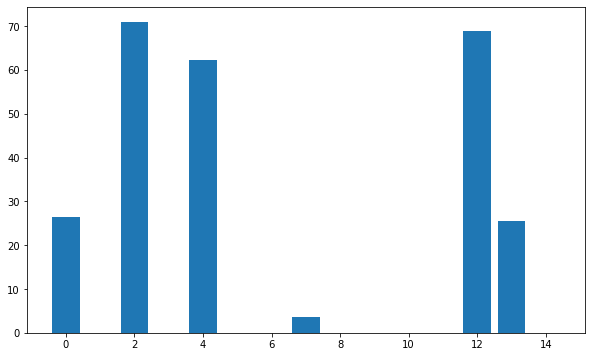

In [10]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
# define the model
model = LinearRegression()
# fit the model
model.fit(X_reg, y_reg)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (10,6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<ins>**Logistic Regression Feature Importance**</ins>

In a similar fashion, we can do the same to fit a [*LogisticRegression()*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model. 

Feature: 0, Score: -0.47207
Feature: 1, Score: 0.15415
Feature: 2, Score: -0.11580
Feature: 3, Score: 0.08169
Feature: 4, Score: 0.22694
Feature: 5, Score: 0.03438
Feature: 6, Score: 0.12977
Feature: 7, Score: -0.03683
Feature: 8, Score: 0.72793
Feature: 9, Score: 0.49874
Feature: 10, Score: 0.17051
Feature: 11, Score: 0.26644
Feature: 12, Score: -0.16955
Feature: 13, Score: 0.29474
Feature: 14, Score: -0.02333


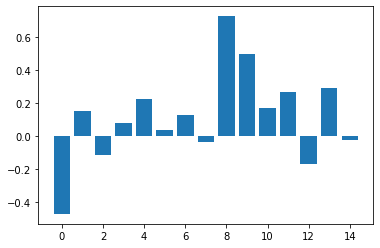

In [12]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_clf, y_clf)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Recall that this is a classification problem with classes 0 and 1 (binary). 

*Why can't we analyze a regression problem with Logistic Regression?*

<a id='section2.1'></a>
### **Feature Extraction**

<a id='section2.2'></a>
### **Feature Selection**

<a id='section2.3'></a>
### **Feature Construction**

<a id='section3'></a>
## **Discerning between different kinds of features**

<a id='section4'></a>
## **Handling missing values**